# 사운드 데이터
특성
- 사람의 목소리를 구분할 때 목소리의 크기로 할 수 없음 -> 진폭은 사람의 특성이라고 볼 수 없음
- 사람의 목소리는 주파수로 바꿔서 봐야함
- 소리의 주파수는 초당 얼마나 진동하는지 나타나는 파형으로
- 파가 많으면 고주파(높은소리 하이톤), 파가 적으면 저주파(낮은 저음)
- 사람의 목소리마다 가지는 주파수의 갯수가 다 다름 (성대구조때문)

In [1]:
# 사운드처리 라이브러리
!pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py) ... done
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached soundfile-0.11.0-py2.py3-none-macosx_10_9_arm64.macosx_11_0_arm64.whl (1.1 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scikit_learn-1.2.1-cp38-cp38-macosx_12_0_arm64.whl (8.3 MB)
  Using cached numba-0.56.4-cp38-cp38-macosx_11_0_arm64.whl (2.4 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-macosx_11_0_arm64.whl (23.1 MB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23702 sha256=883f0a4bea7046fdc50daaee331843ce7c3abce440617e729a728a62f75b0a6c
  Stored in directory: /Users/yun9yuchoi/Library/Caches/pip/wheels/0a/ed/be/49df2538fca496690a024a4374455584d6

In [13]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display

## 데이터 로드
- 총 67253개의 데이터로 구성되어 있고, 초당 22050 개의 데이터로 구성

In [15]:
# 소리데이터 읽기
data_dir = './data/'
wav, sr = librosa.load(data_dir + "test_voice.wav")

# wav, sr = librosa.load(data_dir + "test_voice.wav", sr = 임의 지정 가능)  sr지정하면 소리가 나오는 속도 조절 가능? (음악의 분위기도 바꿀 수 있음)

#t 소리데이터 정보 출력
print(sr)   # 초당 데이터 수?
print(wav.shape)   # 전체 데이터 수?
print(wav.shape[0]/float(sr))   # 3.05초의 플레이타임을 갖는 소리데이터


22050
(67253,)
3.0500226757369613


#### 사운드 데이터 플레이

In [16]:
IPython.display.Audio(data=wav, rate=sr)  # sr는 샘플링 레이트

#### 사운드 데이터 시각화

Text(0, 0.5, 'AMP')

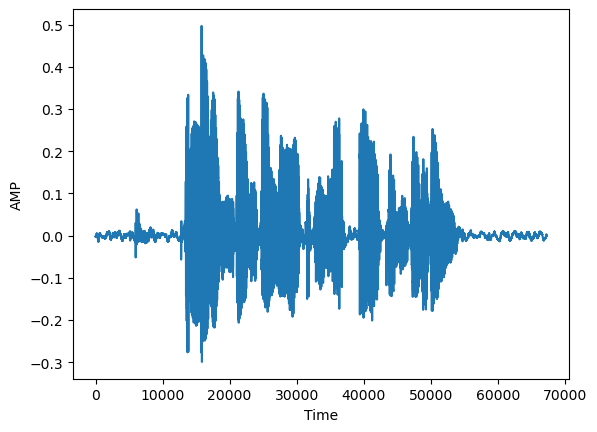

In [17]:
plt.plot(wav)
plt.xlabel("Time")
plt.ylabel('AMP')

Text(0, 0.5, 'AMP')

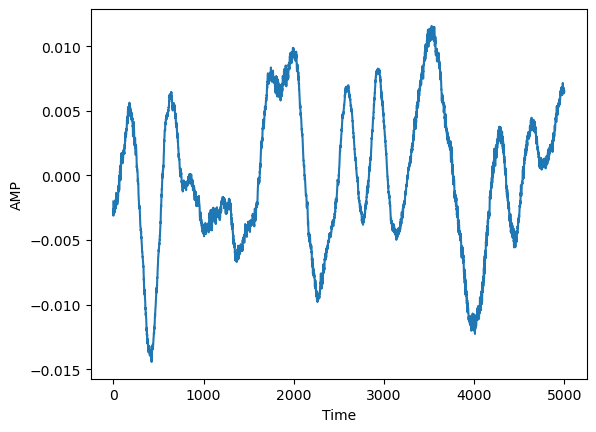

In [18]:
# 일부 시간축 데이터만 출력
plt.plot(wav[:5000])
plt.xlabel("Time")
plt.ylabel('AMP')

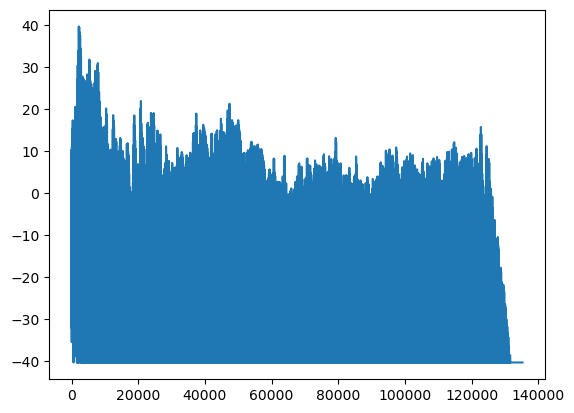

In [19]:
# 주파수 영역으로 변환 (FT : Fourier 변환)
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav)))

plt.plot(dB.flatten())

/opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=30
  return f(*args, **kwargs)


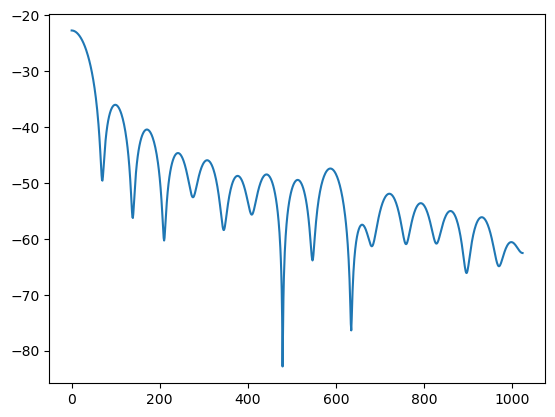

In [20]:
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav[:30])))
plt.plot(dB.flatten())

## Melspectrum 
소리 데이터를 샘플링할 때 저주파부분은 샘플링 간격을 짧게해서 많이하고, 고주파 부분은 길게 샘플링해서 적게 샘플링 
- 사람 귀의 특성을 반영한 것(낮은 음은 잘 듣는데 높은 음으로 갈수록 잘 못 듣는 경향)
- 소리 데이터가 이미지 데이터로 변환되는 효과
- (무지개 색도 주파수로 구분되는 것 처럼 소리의 주파수로 색 매칭 가능하긴함)

/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/1454618905.py:3: FutureWarning: Pass y=[-0.00201423 -0.00310959 -0.00270039 ...  0.00319103  0.00343306
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)


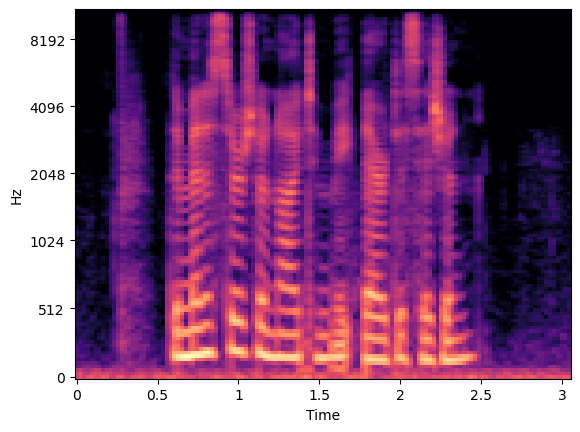

In [21]:
# n_mels : 멜 스펙트럼의 수 (세로축의 눈금 수)
# 시간별 소리의 크기, 주파수, 성분을 시각화
S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)

# 시각화
log_S = librosa.power_to_db(S, ref = np.max)
librosa.display.specshow(log_S, sr=sr, x_axis="time", y_axis="mel")

# 밝은 색은 소리가 큰 것, 어두운 색은 소리가 작은것, 검정색은 소리가 없는 것
# y축은 주파수(위로갈수록 높고 아래로갈수록 낮음), X축은

# [실습1] 자장가 데이터 셋

## 데이터 로드

In [22]:
# 소리데이터 읽기
wav1, sr1 = librosa.load(data_dir + "섬집아기.wav")
wav2, sr2 = librosa.load(data_dir + "섬집아기_반주.wav")
wav3, sr3 = librosa.load(data_dir + "모차르트자장가.wav")
wav4, sr4 = librosa.load(data_dir + "모차르트_자장가_반주.wav")

## 데이터 시각화

### Melspectrum 
소리 데이터를 샘플링할 때 저주파부분은 샘플링 간격을 짧게해서 많이하고, 고주파 부분은 길게 샘플링해서 적게 샘플링 
- 사람 귀의 특성을 반영한 것(낮은 음은 잘 듣는데 높은 음으로 갈수록 잘 못 듣는 경향)
- 소리 데이터가 이미지 데이터로 변환되는 효과
- (무지개 색도 주파수로 구분되는 것 처럼 소리의 주파수로 색 매칭 가능하긴함)

/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/686838699.py:1: FutureWarning: Pass y=[ 3.2431458e-08 -1.2704827e-07  6.2094060e-08 ... -2.8499022e-08
 -2.0748518e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S1 = librosa.feature.melspectrogram(wav1, sr=sr1, n_mels=128)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/686838699.py:2: FutureWarning: Pass y=[ 1.2346190e-08 -8.4141845e-08 -2.1415614e-08 ... -1.1671612e-08
  2.8190469e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S2 = librosa.feature.melspectrogram(wav2, sr=sr2, n_mels=128)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/686838699.py:3: FutureWarning: Pass y=[-1.5801184e-02 -2.5953639e-02 -2.5095079e-02 ... -2.9850492e-07
 -2.3143033e-07 -1.5185130e-07] as keyword args. From version 0.10 passing these as positional arguments will 

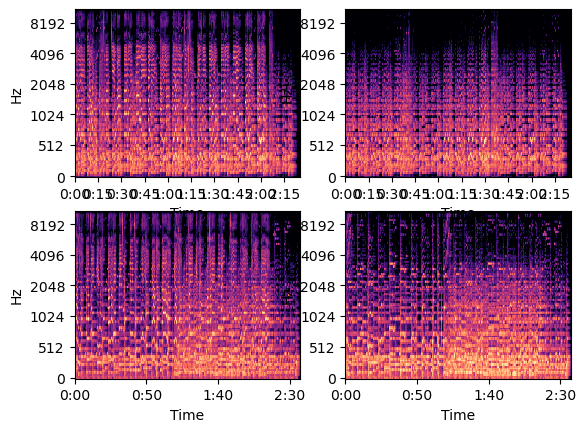

In [23]:
S1 = librosa.feature.melspectrogram(wav1, sr=sr1, n_mels=128)
S2 = librosa.feature.melspectrogram(wav2, sr=sr2, n_mels=128)
S3 = librosa.feature.melspectrogram(wav3, sr=sr3, n_mels=128)
S4 = librosa.feature.melspectrogram(wav4, sr=sr4, n_mels=128)

plt.subplot(2,2,1)
log_S1 = librosa.power_to_db(S1, ref = np.max)
librosa.display.specshow(log_S1, sr=sr1, x_axis="time", y_axis="mel")
plt.subplot(2,2,2)
log_S2 = librosa.power_to_db(S2, ref = np.max)
librosa.display.specshow(log_S2, sr=sr2, x_axis="time", y_axis="mel")
plt.subplot(2,2,3)
log_S3 = librosa.power_to_db(S3, ref = np.max)
librosa.display.specshow(log_S3, sr=sr3, x_axis="time", y_axis="mel")
plt.subplot(2,2,4)
log_S4 = librosa.power_to_db(S4, ref = np.max)
librosa.display.specshow(log_S4, sr=sr4, x_axis="time", y_axis="mel")

### MFCC : Melspectrum을 디지털로 변환한 것

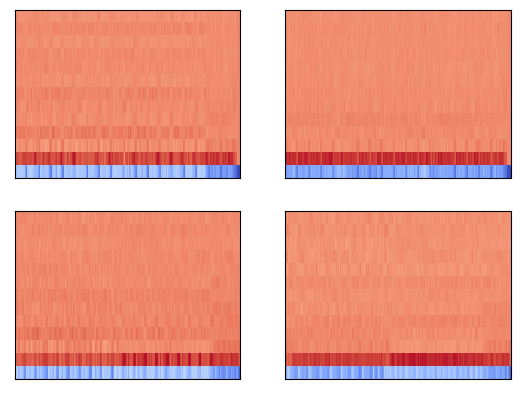

In [24]:
# mfcc : 
# n_mfcc : 세로 축 눈금 수

plt.subplot(2,2,1)
mfcc1 = librosa.feature.mfcc(S = log_S1, n_mfcc=13)
librosa.display.specshow(mfcc1)

plt.subplot(2,2,2)
mfcc2 = librosa.feature.mfcc(S = log_S2, n_mfcc=13)
librosa.display.specshow(mfcc2)

plt.subplot(2,2,3)
mfcc3 = librosa.feature.mfcc(S = log_S3, n_mfcc=13)
librosa.display.specshow(mfcc3)

plt.subplot(2,2,4)
mfcc4 = librosa.feature.mfcc(S = log_S4, n_mfcc=13)
librosa.display.specshow(mfcc4)

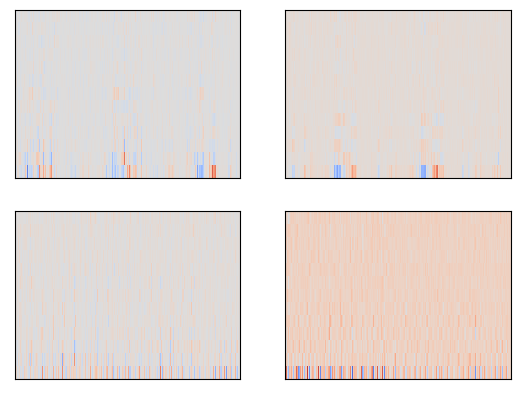

In [25]:
# order 값으로 2차 미분(일정한 값으로 2번나눔)
plt.subplot(2,2,1)
mfcc12 = librosa.feature.delta(mfcc1, order=2)
librosa.display.specshow(mfcc12)
plt.subplot(2,2,2)
mfcc22 = librosa.feature.delta(mfcc2, order=2)
librosa.display.specshow(mfcc22)
plt.subplot(2,2,3)
mfcc32 = librosa.feature.delta(mfcc3, order=2)
librosa.display.specshow(mfcc32)
plt.subplot(2,2,4)
mfcc42 = librosa.feature.delta(mfcc4, order=2)
librosa.display.specshow(mfcc42)

# Melspectrum은 우리 눈으로 보기 더 편함 MFCC는 컴퓨터로 학습시키기 더 편함

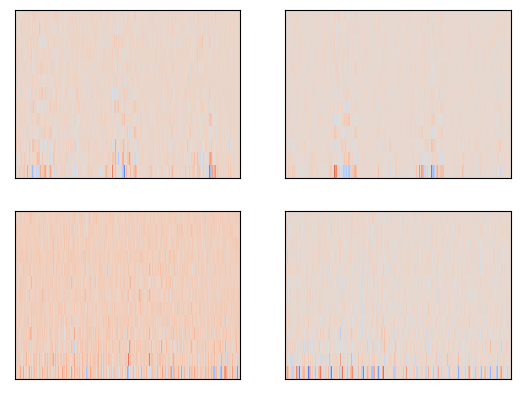

In [26]:
# order 값으로 3차 미분(일정한 값으로 3번 나눔)
plt.subplot(2,2,1)
mfcc13 = librosa.feature.delta(mfcc1, order=3)
librosa.display.specshow(mfcc13)
plt.subplot(2,2,2)
mfcc23 = librosa.feature.delta(mfcc2, order=3)
librosa.display.specshow(mfcc23)
plt.subplot(2,2,3)
mfcc33 = librosa.feature.delta(mfcc3, order=3)
librosa.display.specshow(mfcc33)
plt.subplot(2,2,4)
mfcc43 = librosa.feature.delta(mfcc4, order=3)
librosa.display.specshow(mfcc43)

# [실습2] 아기 울음소리 인식

- 169개의 훈련데이터와 89개의 테스트데이터로 구성
- 울음소리 종류 : 울음(crying), 웃음(laugh), 조용(silence)
- 파일 이름 : 종류(인덱스).wav

- 학습내용  
  (1) 사운드 데이터를 DNN으로 학습해서 울음소리 인식  
  (2) 사운드 데이터를 Conv1D로 학습해서 울음소리 인식  
  (3) 사운드 데이터를 MFCC로 변환해서 Conv2D로 학습해서 울음소리 인식

## ANN DNN CNN RNN
- SLP : 단층 퍼셉트론
_ MLP : 다층 퍼셉트론
- ANN : 인공 신경망 (은닉층 1개)
- DNN : 심층 신경망 (은닉층이 2개 이상)
- CNN : 합성곱 신경망
- RNN : 순환 신경망

In [27]:
X_train = []
X_test = []
y_train = [] 
y_test = []

In [28]:
# 사운드 데이터(1차원 데이터)를 동일한 길이로 만들어주는 함수
# (사운드 데이터, 길이)
# np.hstack : 세로로 합쳐주는 것
def pad1d(wav, i):
  import numpy as np

  # 사운드 데이터가 i보다 긴 경우 (i에서 짤라버림?)
  if wav.shape[0] > i:
    return wav[:i]

  # 사운드 데이터가 i보다 짧은 경우 (빈 공간 0으로 채워줌)
  else:
    return np.hstack(wav, np.zeros(i - wav.shape[0]))


#MFCC 데이터(2차원 데이터)를 동일한 크기로 만들어주는 함수
def pad2d(wav, i):
  import numpy as np
  if wav.shape[1] > i:  # ([1]은 열의 수 받아오는 것)
      return wav[:, :i]
  else:
    return np.hstack(wav. np.zeros(wav.shape[0], i - wav.shape[1]))

In [29]:
list1 = [[[0,0,0,0],
        [0,0,0,0]],
        [[0,0,0,0],
        [0,0,0,0]],
        [[0,0,0,0],
        [0,0,0,0]]]

import numpy as np

arr1 = np.array(list1)

arr1.shape  #(데이터개수 , 행 , 열)

(3, 2, 4)

## 데이터 로드

In [30]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

data_dir = './data/baby_sound/'

train_dir = data_dir + 'train/'
test_dir = data_dir + 'test/'

# train 폴더의 사운드 파일을 읽어서 wav를 특성데이터로 저장하고 파일명을 라벨데이터로 저장

# os.listdir : 해당되는 폴더명과 파일명을 다 가지고 옴
for fname in os.listdir(train_dir) :
  
  # wav 파일이 아닌 경우 아무런 처리 하지 않음
  if ".wav" not in fname:
    continue
  
  # 파일이름 라벨데이터에 저장(3개의 라벨 : crying, laugh, silence)
  # 파일이름 : 울음종류 (인덱스).wav
  label = fname.split(" ")[0]   #파일이름을 빈공백으로 자르고 0번 인덱스를 라벨 변수에 담음
  y_train.append(label)

  #사운드 데이터를 같은 길이로 만들어서 특성 데이터로 저장
  wav, sr = librosa.load(train_dir + fname)

  pad_x = pad1d(wav, 30000)
  X_train.append(pad_x)

In [31]:
# test
for fname in os.listdir(test_dir) :
  
  # wav 파일이 아닌 경우 아무런 처리 하지 않음
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]   
  y_test.append(label)

  #사운드 데이터를 같은 길이로 만들어서 특성 데이터로 저장
  wav, sr = librosa.load(test_dir + fname)

  pad_x = pad1d(wav, 30000)
  X_test.append(pad_x)

In [32]:
# 가로로 정렬되어 있는 리스트 데이터를 배열의 행 데이터로 변환
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
X_train.shape, X_test.shape
# np.array(X_train)으로 배열형태로 바꿔도 됨

((169, 30000), (89, 30000))

In [33]:
# y를 원핫 인코딩
import pandas as pd

y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

y_train_en.shape, y_test_en.shape

((169, 3), (89, 3))

## (1) 사운드 데이터를 DNN으로 학습하기


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

#입력층
model1.add(Dense(512,input_dim=30000,activation='relu'))
model1.add(Dropout(0.3))

#은닉층
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))

#출력층
model1.add(Dense(3, activation='softmax'))

model1.summary()

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_

2023-02-14 19:20:34.742351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 19:20:34.742471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [36]:
h1 = model1.fit(X_train, y_train_en, epochs=10, batch_size=32, validation_data=(X_test, y_test_en))

2023-02-14 19:20:35.208933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-14 19:20:35.212442: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2023-02-14 19:20:35.433011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 4s 200ms/step - loss: 1.0437 - accuracy: 0.4379 - val_loss: 0.7321 - val_accuracy: 0.4382
Epoch 2/10
1/6 [====>.........................] - ETA: 0s - loss: 0.7521 - accuracy: 0.5625

2023-02-14 19:20:38.977346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 31ms/step - loss: 1.1001 - accuracy: 0.4970 - val_loss: 0.7129 - val_accuracy: 0.6404
Epoch 3/10
6/6 [==============================] - 0s 30ms/step - loss: 0.6740 - accuracy: 0.7574 - val_loss: 0.8370 - val_accuracy: 0.7640
Epoch 4/10
6/6 [==============================] - 0s 29ms/step - loss: 0.6115 - accuracy: 0.8284 - val_loss: 0.7552 - val_accuracy: 0.7640
Epoch 5/10
6/6 [==============================] - 0s 29ms/step - loss: 0.4534 - accuracy: 0.9349 - val_loss: 0.6858 - val_accuracy: 0.7640
Epoch 6/10
6/6 [==============================] - 0s 29ms/step - loss: 0.2921 - accuracy: 0.9763 - val_loss: 0.7059 - val_accuracy: 0.7640
Epoch 7/10
6/6 [==============================] - 0s 31ms/step - loss: 0.2267 - accuracy: 0.9763 - val_loss: 0.8805 - val_accuracy: 0.7753
Epoch 8/10
6/6 [==============================] - 0s 29ms/step - loss: 0.2484 - accuracy: 0.9586 - val_loss: 0.7506 - val_accuracy: 0.7865
Epoch 9/10
6/6 [======================

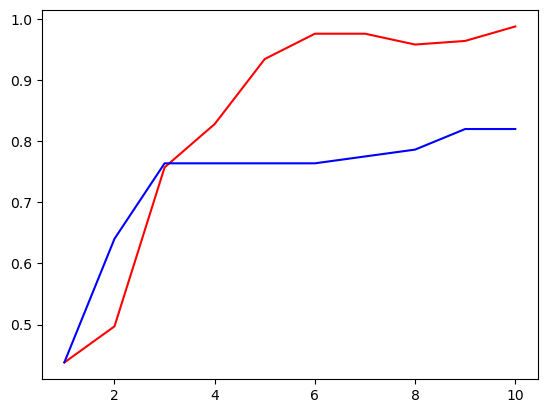

In [37]:
import matplotlib.pyplot as plt
acc = h1.history["accuracy"]
val_acc = h1.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

In [38]:
# 예측하기
pred1 = model1.predict(X_test)

print(pred1[0])    
print('-'*50)
print(y_test_en.iloc[0])

[0.05464159 0.01498769 0.93037075]
--------------------------------------------------
crying     0
laugh      0
silence    1
Name: 0, dtype: uint8


2023-02-14 19:20:40.890943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [39]:
# 예측하기
pred1 = model1.predict(X_test)

a = pred1[0][0]
b = pred1[0][1]
c = pred1[0][2]
d = y_test_en.iloc[0][0]
e = y_test_en.iloc[0][1]
f = y_test_en.iloc[0][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

predict : silence
predict : silence


## (2) 사운드 데이터를 Conv1D로 학습해서 울음소리 인식

In [40]:
# Conv1D에 입력하기 위해서 차원을 한층 증가
# 끝인덱스에 차원하나를 증가하겠다는 것 (-1)

X_train_ex = np.expand_dims(X_train, -1)
X_test_ex = np.expand_dims(X_test, -1)

X_train_ex.shape, X_test_ex.shape

((169, 30000, 1), (89, 30000, 1))

In [41]:
#신경망 설계 
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten

model2 = Sequential()

#특징 추출부
model2.add(Conv1D(filters=64, kernel_size=3,
                  input_shape=(30000,1), activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=3))

model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(GlobalAveragePooling1D())
model2.add(Dropout(0.5))

#분류층
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29998, 64)         256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29996, 64)         12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9998, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9996, 128)         24704     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9994, 128)         49280     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [42]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [43]:
h2 = model2.fit(X_train_ex, y_train_en, epochs=50, batch_size=32, validation_data=(X_test_ex, y_test_en))

Epoch 1/50


2023-02-14 19:20:41.650403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 1.0770 - accuracy: 0.4379

2023-02-14 19:20:46.200344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 5s 492ms/step - loss: 1.0770 - accuracy: 0.4379 - val_loss: 1.0148 - val_accuracy: 0.4719
Epoch 2/50
6/6 [==============================] - 3s 411ms/step - loss: 0.9891 - accuracy: 0.5325 - val_loss: 0.8809 - val_accuracy: 0.6180
Epoch 3/50
6/6 [==============================] - 3s 444ms/step - loss: 0.8921 - accuracy: 0.6154 - val_loss: 0.7612 - val_accuracy: 0.7528
Epoch 4/50
6/6 [==============================] - 3s 407ms/step - loss: 0.8087 - accuracy: 0.6805 - val_loss: 0.6355 - val_accuracy: 0.8315
Epoch 5/50
6/6 [==============================] - 2s 407ms/step - loss: 0.7262 - accuracy: 0.7692 - val_loss: 0.4864 - val_accuracy: 0.8427
Epoch 6/50
6/6 [==============================] - 3s 431ms/step - loss: 0.6044 - accuracy: 0.7811 - val_loss: 0.3688 - val_accuracy: 0.8539
Epoch 7/50
6/6 [==============================] - 3s 411ms/step - loss: 0.5219 - accuracy: 0.7811 - val_loss: 0.3264 - val_accuracy: 0.8539
Epoch 8/50
6/6 [===============

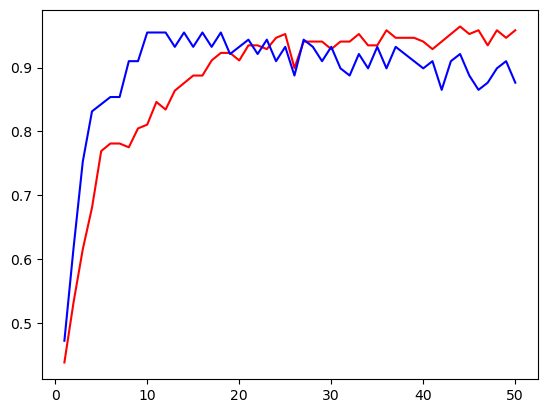

In [44]:
import matplotlib.pyplot as plt
acc = h2.history["accuracy"]
val_acc = h2.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

In [46]:
# 예측하기
pred2 = model2.predict(X_test)

a = pred2[0][0]
b = pred2[0][1]
c = pred2[0][2]
d = y_test_en.iloc[0][0]
e = y_test_en.iloc[0][1]
f = y_test_en.iloc[0][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 30000)


## (3) 사운드 데이터를 MFCC로 변환해서 Conv2D로 학습해서 울음소리 인식

In [47]:
X_train = []
X_test = []
y_train = []
y_test = []

In [48]:
# 훈련 데이터 변환
import os

for fname in os.listdir(train_dir):
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]
  y_train.append(label)

  wav, sr = librosa.load(train_dir + fname)
  mfcc = librosa.feature.mfcc(wav)

  pad_x = pad2d(mfcc, 40)
  X_train.append(pad_x)

/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/2921613060.py:12: FutureWarning: Pass y=[-0.12030025 -0.18157293 -0.14825873 ...  0.04563848  0.04351621
  0.05000935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/2921613060.py:12: FutureWarning: Pass y=[ 0.15212838  0.15949896  0.01406818 ... -0.19255833 -0.22185683
 -0.3119442 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/2921613060.py:12: FutureWarning: Pass y=[0.04563796 0.07239392 0.05964772 ... 0.17519291 0.17391704 0.18572156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_

In [49]:
# 테스트 데이터 변환
for fname in os.listdir(test_dir):
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]
  y_test.append(label)

  wav, sr = librosa.load(test_dir + fname)
  mfcc = librosa.feature.mfcc(wav)

  pad_x = pad2d(mfcc, 40)
  X_test.append(pad_x)

/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/693799676.py:10: FutureWarning: Pass y=[-0.07889859 -0.11643636 -0.10180789 ...  0.07133213  0.07354491
  0.07664822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/693799676.py:10: FutureWarning: Pass y=[-0.17742702 -0.33246088 -0.37305158 ...  0.38976628  0.29129884
  0.16935207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipykernel_16842/693799676.py:10: FutureWarning: Pass y=[-0.03475488 -0.05147098 -0.04359783 ...  0.46096155  0.45461398
  0.47805318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
/var/folders/12/gbtc492d66jfrlnvrtjqzy780000gn/T/ipyker

In [50]:
# 리스트를 배열로 변환
import pandas as pd

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

X_train.shape, y_train_en.shape, X_test.shape, y_test_en.shape

((169, 20, 40), (169, 3), (89, 20, 40), (89, 3))

In [51]:
# 색상차원 추가
X_train_ex = np.expand_dims(X_train, -1)
X_test_ex = np.expand_dims(X_test, -1)

X_train_ex.shape, X_test_ex.shape

((169, 20, 40, 1), (89, 20, 40, 1))

In [52]:
X_train_ex[0].shape

(20, 40, 1)

In [53]:
#신경망 설계 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential

model3 = Sequential()

#특징 추출부
model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(20, 40, 1)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3)))
model3.add(GlobalAveragePooling2D())
model3.add(Dropout(0.5))

#분류층
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 38, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 38, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 18, 38, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 19, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 17, 64)         36928     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [54]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [56]:
h3 = model3.fit(X_train, y_train_en, epochs=50, batch_size=32, validation_data=(X_test, y_test_en))

Epoch 1/50


ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 20, 40)


In [57]:
import matplotlib.pyplot as plt
acc = h3.history["accuracy"]
val_acc = h3.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

NameError: name 'h3' is not defined

In [58]:
# 예측하기
pred3 = model3.predict(X_test)

a = pred3[84][0]
b = pred3[84][1]
c = pred3[84][2]
d = y_test_en.iloc[84][0]
e = y_test_en.iloc[84][1]
f = y_test_en.iloc[84][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 20, 40)


# STT(Speech To Text)

In [59]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 45.1 MB/s eta 0:00:0000:0100:01


In [60]:
dir_path = './data/'

In [65]:
import speech_recognition as sr
# 음악소리 때문에 발음이 뭉개지니까 음성만 있으면 더 잘나옴

file_path = dir_path + "모차르트자장가.wav"

# 초기화
r = sr.Recognizer()

# 음성 데이터 가져오기
wav_file = sr.AudioFile(file_path)

with wav_file as w :
  wav = r.record(w)
  
# STT 수행
txt = r.recognize_google(audio_data=wav, language='ko-KR')

print(txt)

result2:
{   'alternative': [   {   'confidence': 0.86808032,
                           'transcript': '잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 '
                                         '달님은 영창으로 빙글 색은 곳에 위치한 밤 잘 자라 우리 아가 잘 '
                                         '자 거라 잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 '
                                         '다들 자는데 알림을 평창으로 7부 색 잘 자라 우리 아가 잘 자 '
                                         '거라'},
                       {   'transcript': '잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 '
                                         '달님은 영창으로 빙글 색은 곳에 위치한 밤 잘 자라 우리 아가 잘 '
                                         '자 거라 잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 '
                                         '다들 자는데 알림을 평창으로 7부 색 잘 자라 우리 아가 잘 자 '
                                         '둬라'},
                       {   'transcript': '잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 '
                                         '달님은 영창으로 빙글 색은 곳에 위치한 밤 잘 자라 우리 아가 잘 '
                                      

# TTS(Text To Speech)

In [64]:
!pip install  gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.2 MB/s eta 0:00:00


In [66]:
from gtts import gTTS

txt = "안녕하세요. 우리는 사물지능반입니다. 반갑습니다."

tts = gTTS(text = txt, lang="ko")

tts.save(dir_path+"helloKo.mp3")

In [67]:
!pip install IPython

In [68]:
import librosa
import IPython.display

wav, sr = librosa.load(dir_path + "helloKo.mp3")

IPython.display.Audio(data=wav, rate=sr)

# 타코트론(음성 합성 라이브러리)